Determine the mean square displacement of a one-dimensional random walk as a function of time and confirm the expected time dependence.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

Text(0.5, 1.0, 'Random walk simulations')

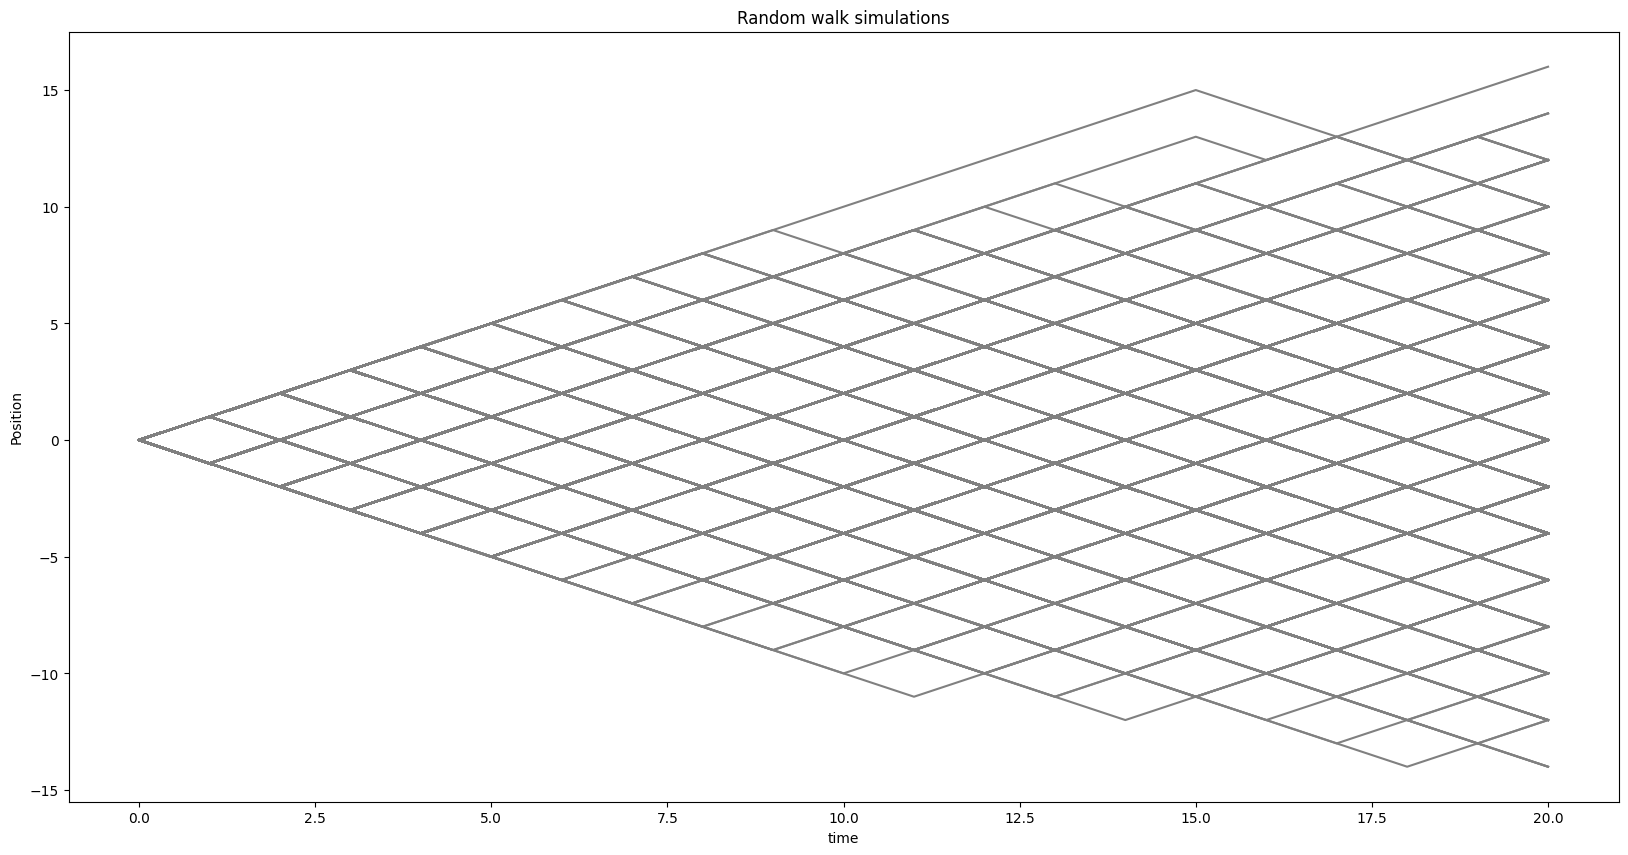

In [3]:
t_total = 20
N = 2000
list_t = np.arange(t_total+1)
random_walks = []

plt.figure(figsize=(20,10))

for i in range(N):
    np.random.seed(i)
    steps = np.random.choice([1,-1], t_total)
    position = np.cumsum(steps)
    position = np.insert(position,0,0)
    random_walks.append(position)
    plt.plot(list_t, position, "grey")


mean_displacements = {}
for t in list_t:
    displacement = [p[t] for p in random_walks]
    msd = np.mean([d**2 for d in displacement])
    mean_displacements[t] = msd

plt.xlabel("time")
plt.ylabel("Position")
plt.title("Random walk simulations")

In [4]:
random_walks = np.array(random_walks)
random_walks.shape

(2000, 21)

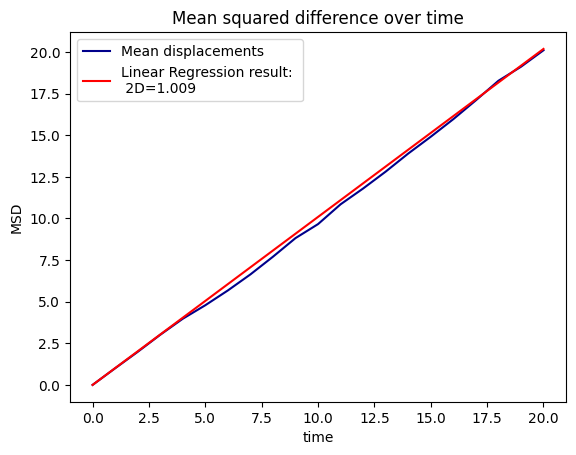

In [5]:
def MSD_theoretical(t, D):
    return np.sqrt(2*D*t)

list_msd = np.array(list(mean_displacements.values()))

def plot_msd(tlist, msdlist):
    plt.plot(tlist, msdlist, "darkblue", label="Mean displacements")
    plt.ylabel("MSD")
    plt.xlabel("time")
    plt.title("Mean squared difference over time")

    res = linregress(tlist, msdlist)
    plt.plot(tlist, res.slope*np.array(tlist),"red" , label=f"Linear Regression result: \n 2D={np.round(res.slope,3)}")

    plt.legend()
plot_msd(list_t, list_msd)

Text(0.5, 1.0, 'Position frequency after last time step')

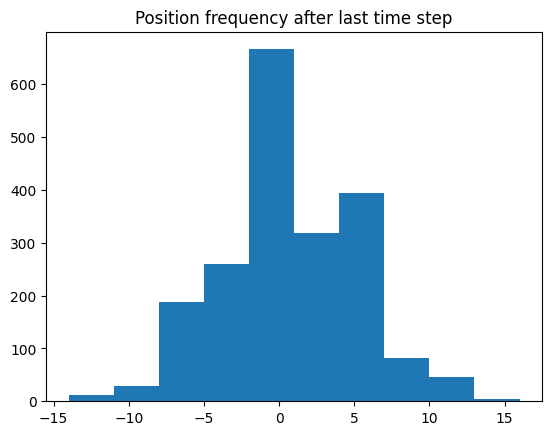

In [6]:
positions_end = [rw[-1] for rw in random_walks]
plt.hist(positions_end)
plt.title("Position frequency after last time step")

## Problem 2

b) Perform a numerical integration to generate trajectories of Brownian motion in one dimension. Plot the
position as a function of time.
c) Generate many such trajectories and calculate the mean square displacement, plot it as a function of time.

In [7]:
def em_step(t, y, dt, f, G):

    DW = np.random.normal(size=len(y))
    return y + f(t,y)*dt + np.dot(G(t,y), DW) * np.sqrt(dt)

# Params:
#
#    t_list = Sorted np.array with output times
#    y0 = initial state vector
#    dt_max = maximum step size
#    f = drift function (vector)
#    G = diffusion function (matrix)

def eulermaruyama(t_list, y0, dt_max, f, G):
    y_list = np.zeros((len(t_list), len(y0))) # List of results

    t = 0 # Current simulation time
    y = y0

    for i, T in enumerate(t_list):

        while(t < T):
            # Determine time step. Either dt_max, or shorter to
            # hit the next output point.
            dt = min(T-t, dt_max)
            y = em_step(t, y, dt, f, G)
            t += dt

        y_list[i,:] = y

    return y_list

def f(t,y):
    return 0

def G(t,y):
    return np.diag(np.ones(len(y))) * np.sqrt(2) / 10

In [8]:
y0 = np.ones(40)
t = np.linspace(0,1,100)
dt = 1e-4

y = eulermaruyama(t, y0, dt, f, G)

Text(0.5, 1.0, 'Brownian motion in 1D')

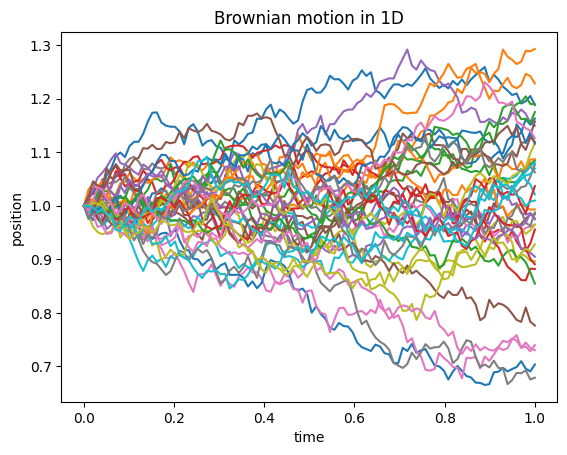

In [9]:
plt.plot(t, y)
plt.xlabel("time")
plt.ylabel("position")
plt.title("Brownian motion in 1D")

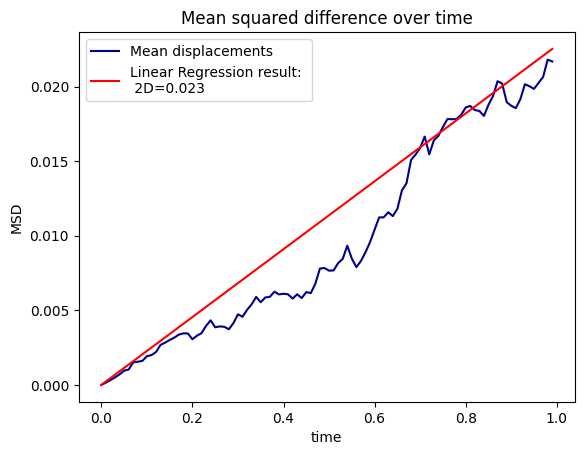

In [10]:
mean_displacements_2 = {}
for t_step in range(100):
    displacement = y[t_step, :]-1
    msd = np.mean([d**2 for d in displacement])
    mean_displacements_2[0.01*t_step] = msd
plot_msd(np.array(list(mean_displacements_2.keys())), list(mean_displacements_2.values()))

## Problem 3

Add a constant velocity to the equation of motion for Brownian motion. Determine again the mean square
displacement numerically. Identify the two regimes (use a log-log plot). You may have to try different values of
the velocity to see the two regimes well.

In [27]:
def f_drift(t,y):
    return 1

y = eulermaruyama(t, y0, dt, f_drift, G)

Text(0.5, 1.0, 'Brownian motion with drift in 1D')

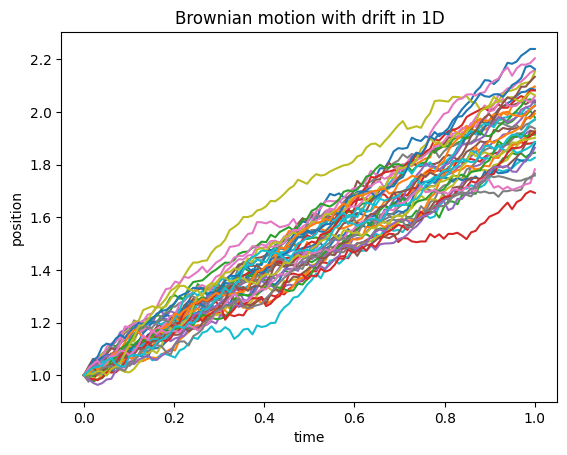

In [28]:
plt.plot(t, y)
plt.xlabel("time")
plt.ylabel("position")
plt.title("Brownian motion with drift in 1D")

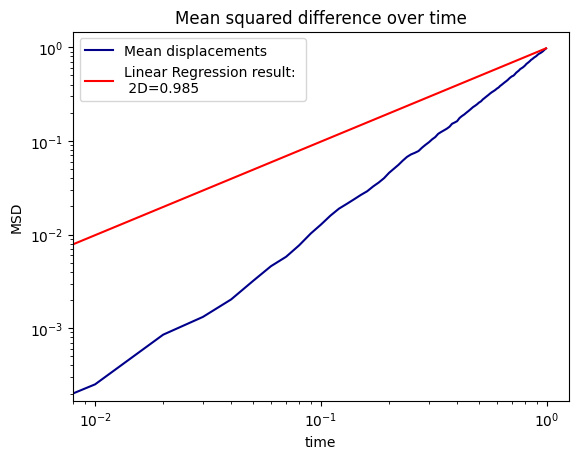

In [34]:
mean_displacements_3 = {}
for t_step in range(100):
    displacement = y[t_step, :]-1
    msd = np.mean([d**2 for d in displacement])
    mean_displacements_3[0.01*t_step] = msd
x1 = np.array(list(mean_displacements_3.keys()))
x2 = np.array(list(mean_displacements_3.values()))
plot_msd(x1,x2)
plt.yscale("log")
plt.xscale("log")

In [30]:
mean_displacements_3

{0.0: 0.0,
 0.01: 0.00025134040608144946,
 0.02: 0.0008520002724466625,
 0.03: 0.0013196383712128796,
 0.04: 0.002029188772122802,
 0.05: 0.003196073671141919,
 0.06: 0.004591535327897717,
 0.07: 0.005788202656722585,
 0.08: 0.007680244248629174,
 0.09: 0.010256665704235116,
 0.1: 0.012814756243911018,
 0.11: 0.015924031409734425,
 0.12: 0.018908716243073876,
 0.13: 0.021271620085863134,
 0.14: 0.023807043956850474,
 0.15: 0.02650295968814248,
 0.16: 0.02901458409317443,
 0.17: 0.032653877203489876,
 0.18: 0.03597239006751831,
 0.19: 0.040030562211702314,
 0.2: 0.04565299638691679,
 0.21: 0.05045305460201186,
 0.22: 0.05552535007060644,
 0.23: 0.06166810372799038,
 0.24: 0.06749817539389665,
 0.25: 0.07175183298175396,
 0.26: 0.07464364633922944,
 0.27: 0.07802941335540592,
 0.28: 0.08487953039874614,
 0.29: 0.09098015131901942,
 0.3: 0.09671436308385659,
 0.31: 0.10391446605987728,
 0.32: 0.1098594121472715,
 0.33: 0.1191917277621013,
 0.34: 0.12468135107905465,
 0.35000000000000003: 

## Problem 4: Diffusion of Protein
How long does it take a macromolecule, e.g. a protein or an RNA, to traverse a cell? Estimate or look up typical diffusion coefficients and compare the time for a bacterium (size $1 \mu m$), a typical human cell (size $50 \mu m$) and the axon of a neuron (length $5 cm$). (Estimate an order of magnitude rather than precise numbers.

The time it takes for a macromolecule to diffuse across a distance can be estimated using the formula:

$D= \frac{l^2}{2 \Delta t}$,

where $l$ is the distance traveled in the time $\Delta t$. The Diffusion coefficient D can be expressed via the Stokes-Einstein relation:

$D= \frac{k_{B}T}{6\pi \eta R}$.

We assume the following values:

Temperature $T = 298 K$ (room temperature)
Viscosity of water $\eta = 0.001 Pa s$ (for water)
Radius of the macromolecule $R=1 \mu m$

Thus, we obtain $D$ and $\Delta t$:

In [44]:
def Diffusion_coefficient(T, eta, R):
    k = 1.380649e-23
    return k*T/(6*np.pi*eta*R)

print("D = ", Diffusion_coefficient(298, 0.001, 1e-6), " m^2/s")

sizes = {"bacterium": 1e-6, "human cell": 50e-6, "axon": 5e-2}

for key in sizes.keys():
    print(key, ": t=", np.round((sizes[key]**2)/(2*Diffusion_coefficient(298, 0.001, 1e-6)), 1), "s")

D =  2.1827219893804968e-13  m^2/s
bacterium : t= 2.3 s
human cell : t= 5726.8 s
axon : t= 5726794370.0 s
